# Detect sequential data

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

The function `detect_equals.py` detects initial and final indices in the 1D numpy array_like `x` of sequential data identical to parameter `value` (default = 0). Use parameter `min_seq` to set the minimum number of sequential values to detect (default = 1).

`detect_equals.py` signature is:
```python
inds = (x, value=0, min_seq=1, show=False, ax=None)
```
Let's see how `detect_equals.py` works; first let's import the necessary Python libraries and configure the environment:  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from detect_equals import detect_equals

Let's run the function examples:

In [2]:
    >>> x = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
    >>> detect_equals(x)

array([[ 1,  3],
       [ 7,  7],
       [ 9, 11]], dtype=int64)

There is an option to plot the results:

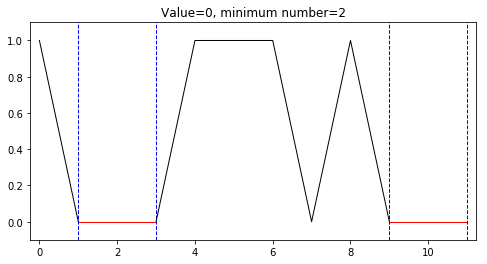

array([[ 1,  3],
       [ 9, 11]], dtype=int64)

In [3]:
    >>> detect_equals(x, value=0, min_seq=2, show=True)  

## Function `detect_equals.py`

In [ ]:
# %load ./../functions/detect_equals.py
"""Detect initial and final indices of sequential data identical to value."""

import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.0"
__license__ = "MIT"


def detect_equals(x, value=0, min_seq=1, show=False, ax=None):
    """Detect initial and final indices of sequential data identical to value.

    Parameters
    ----------
    x : 1D numpy array_like
        array to search for sequential data
    value : number, optional (default = 0)
        Value to detect as sequential data
    min_seq : integer, optional (default = 1)
        Minimum number of sequential values to detect
    show : bool, optional (default = False)
        Show plot (True) of not (False).
    ax : matplotlib object, optional (default = None)
        Matplotlib axis object where to plot.

    Returns
    -------
    inds : 2D numpy array [indi, indf]
        Initial and final indices of sequential data identical to value

    References
    ----------
    .. [1] http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/detect_equals.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> x = [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0]
    >>> detect_equals(x)

    >>> inds = detect_equals(x, value=0, min_seq=2, show=True)
    """

    isvalue = np.concatenate(([0], np.equal(x, value), [0]))
    inds = np.where(np.abs(np.diff(isvalue)) == 1)[0].reshape(-1, 2)
    if min_seq > 1:
        inds = inds[np.where(np.diff(inds, axis=1) >= min_seq)[0]]
    inds[:, 1] = inds[:, 1] - 1
    if show:
        _plot(x, value, min_seq, ax, inds)

    return inds


def _plot(x, value, min_seq, ax, inds):
    """Plot results of the detect_equals function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        x = np.asarray(x)
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        if inds.size:
            for (indi, indf) in inds:
                if indi == indf:
                    ax.plot(indf, x[indf], 'ro', mec='r', ms=6)
                else:
                    ax.plot(range(indi, indf+1), x[indi:indf+1], 'r', lw=1)
                    ax.axvline(x=indi, color='b', lw=1, ls='--')
                ax.axvline(x=indf, color='b', lw=1, ls='--')
            inds = np.vstack((np.hstack((0, inds[:, 1])),
                              np.hstack((inds[:, 0], x.size-1)))).T
            for (indi, indf) in inds:
                ax.plot(range(indi, indf+1), x[indi:indf+1], 'k', lw=1)
        else:
            ax.plot(x, 'k', lw=1)

        ax.set_xlim(-.02*x.size, x.size*1.02-1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        text = 'Value=%.3g, minimum number=%d'
        ax.set_title(text % (value, min_seq))
        plt.show()
